<a href="https://colab.research.google.com/github/AdrianCPC/DS_Students_data_01/blob/main/Capitulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Creando nombres

In [2]:
nombres_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking/?sexo=M&qtd=200')
nombres_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking/?sexo=F&qtd=200')

In [ ]:
type(nombres_m)

pandas.core.frame.DataFrame

In [ ]:
print("Cantidad de nombres :"+ str(len(nombres_m)+len(nombres_f)))

Cantidad de nombres :400


###Union de los dos dataframes

In [3]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

###Union por concatenacion y conversion de la serie en dataframe  mas cambio de nombre de la columna

In [6]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

,nombre
111,TAMIRES
51,JOANA
59,ISABEL
149,ISRAEL
144,VINICIOS


#Inlcuyendo ID Alumnos

In [ ]:
nombres.sample(5)

In [7]:
import numpy as np

In [8]:
np.random.seed(123)

In [9]:
total_alumnos = len(nombres)
total_alumnos

400

In [10]:
nombres['id_alumno'] = np.random.permutation(total_alumnos)+1
nombres.sample(5)

,nombre,id_alumno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


##Adicion de email

In [12]:
dominios = ['@dominiodeemail.com','@serviciodeemail.com']

In [13]:
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

,nombre,id_alumno,dominio
84,FATIMA,78,@dominiodeemail.com
0,MARIA,331,@serviciodeemail.com
179,LILIANE,340,@dominiodeemail.com
10,LUIS,174,@dominiodeemail.com
171,VALDEMIR,45,@dominiodeemail.com


##Agregando usuario

In [14]:
nombres['email'] = nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

,nombre,id_alumno,dominio,email
114,ELZA,320,@dominiodeemail.com,elza@dominiodeemail.com
57,IGOR,303,@serviciodeemail.com,igor@serviciodeemail.com
85,FABRICIO,221,@dominiodeemail.com,fabricio@dominiodeemail.com
183,MARLON,8,@dominiodeemail.com,marlon@dominiodeemail.com
189,WESLEI,137,@dominiodeemail.com,weslei@dominiodeemail.com


En esta aula, aprendimos:

A leer un json con la función read_json() para buscar los nombres de los alumnos y alumnas.

A juntar los nombres masculinos y femeninos con la función concat() y transformarlos en un nuevo DataFrame con el comando to_frame().

A insertar un id para identificar mejor a cada persona.

#Creando cursos

In [4]:
import html5lib

In [15]:
url = 'https://www.tiobe.com/tiobe-index/'

In [16]:
cursos = pd.read_html(url)
cursos = cursos[2].iloc[:,:1] #obteniendo la tercera tabla y iloc para usar 1er columna
cursos.head()

,Programming Language
0,Python
1,C
2,Java
3,C++
4,C#


In [ ]:
type(cursos)

pandas.core.frame.DataFrame

#Adicionando Index

In [17]:
cursos = cursos.rename(columns={'Programming Language': 'nombre_curso'})

In [18]:
cursos['id'] = cursos.index + 1
cursos

,nombre_curso,id
0,Python,1
1,C,2
2,Java,3
3,C++,4
4,C#,5
5,Visual Basic,6
6,JavaScript,7
7,SQL,8
8,Assembly language,9
9,PHP,10


In [19]:
cursos = cursos.set_index('id')
cursos.head()

,nombre_curso
id,
1,Python
2,C
3,Java
4,C++
5,C#


In [20]:
cursos.shape

(15, 1)

En esta aula, aprendimos:

A leer una tabla de una página html con la función read_html(), pasando la url como parámetro para buscar los nombres de los cursos.

A transformar el resultado de esta función en un DataFrame con el código cursos = cursos[0].

A crear un ID para cada curso y a configurar el index para que sea el ID con el código cursos = cursos.set_index('id').

#Matriculando estudiantes

In [24]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,7
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,1
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,3


In [25]:
nombres.describe() # descripcion del dataframe

,id_alumno,matriculas
count,400.000000,400.000000
mean,200.500000,2.022500
std,115.614301,1.499204
min,1.000000,1.000000
25%,100.750000,1.000000
50%,200.500000,2.000000
75%,300.250000,2.250000
max,400.000000,12.000000


In [26]:
nombres.matriculas.describe()

count    400.000000
mean       2.022500
std        1.499204
min        1.000000
25%        1.000000
50%        2.000000
75%        2.250000
max       12.000000
Name: matriculas, dtype: float64

In [27]:
import seaborn as sns

<ipython-input-30-68059771b3aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas)


<Axes: xlabel='matriculas', ylabel='Density'>

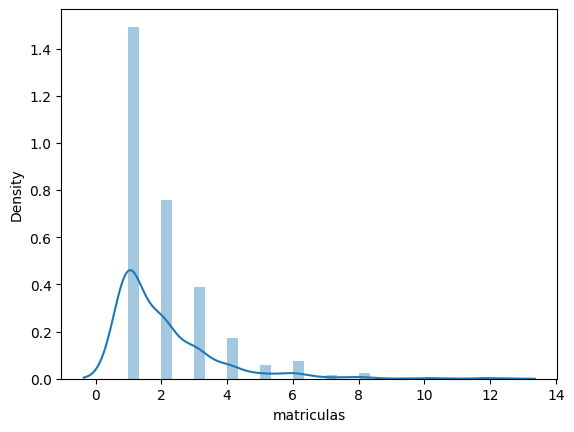

In [30]:
sns.distplot(nombres.matriculas)

In [32]:
nombres.matriculas.value_counts() # matriculados en numeros

1     199
2     101
3      52
4      23
6      10
5       8
8       3
7       2
12      1
10      1
Name: matriculas, dtype: int64

#Seleccionando Alumnos y cursos




In [33]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,7
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,1
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,3


In [35]:
todas_matriculas = []
x = np.random.rand(len(cursos)) #20 cursos pero en este caso son 15
prob = x/sum(x)
prob

array([0.04814298, 0.10887202, 0.08425249, 0.08914813, 0.0470237 ,
       0.01084908, 0.08606198, 0.10748278, 0.08327805, 0.08690581,
       0.10082149, 0.00647628, 0.03233711, 0.08874248, 0.01960562])

In [36]:
for index, row in nombres.iterrows():#recorriendo fila por fila
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id,np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_alumno', 'id_curso'])
matriculas.head()


,id_alumno,id_curso
0,235,4
1,43,1
2,304,3
3,304,1
4,304,11


In [39]:
matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso','id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending=False)

,nombre_curso,Total
id_curso,,
8,SQL,91
11,Objective-C,89
2,C,84
9,Assembly language,78
7,JavaScript,74
14,Pascal,74
3,Java,69
10,PHP,65
4,C++,58


In [40]:
prob

array([0.04814298, 0.10887202, 0.08425249, 0.08914813, 0.0470237 ,
       0.01084908, 0.08606198, 0.10748278, 0.08327805, 0.08690581,
       0.10082149, 0.00647628, 0.03233711, 0.08874248, 0.01960562])

In [34]:
cursos.head()

,nombre_curso
id,
1,Python
2,C
3,Java
4,C++
5,C#


In [41]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])
matriculas_por_curso

,id_alumno,nombre_curso
id_curso,,
1,43,Python
2,84,C
3,69,Java
4,58,C++
5,25,C#
6,10,Visual Basic
7,74,JavaScript
8,91,SQL
9,78,Assembly language


#Salidas por diferentes formatos

In [42]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [44]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [45]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index=False)

En esta aula, aprendimos:

A crear una nueva columna en el DataFrame nombres llamada matriculas para mostrar el número de cursos inscritos que tiene cada alumno.

A generar un nuevo DataFrame matriculas para guardar los cursos inscritos que tiene cada alumno.

A realizar un join entre los DataFrames matriculas y cursos para mostrar el número de estudiantes en cada curso.

Y aprendimos también a leer y escribir un DataFrame en diferentes tipos: csv, json y html.